In [ ]:
#hide
!pip install fastai==2.2.5

In [6]:
from fastai.vision.all import *

In [30]:
from ipywidgets import FileUpload, Output, Label, VBox, Button

In [8]:
path = untar_data(URLs.PASCAL_2007)

In [9]:
path.ls()


(#8) [Path('/root/.fastai/data/pascal_2007/segmentation'),Path('/root/.fastai/data/pascal_2007/valid.json'),Path('/root/.fastai/data/pascal_2007/train.csv'),Path('/root/.fastai/data/pascal_2007/test'),Path('/root/.fastai/data/pascal_2007/train.json'),Path('/root/.fastai/data/pascal_2007/test.json'),Path('/root/.fastai/data/pascal_2007/train'),Path('/root/.fastai/data/pascal_2007/test.csv')]

In [10]:
(path / "train") .ls()

(#5012) [Path('/root/.fastai/data/pascal_2007/train/006339.jpg'),Path('/root/.fastai/data/pascal_2007/train/009463.jpg'),Path('/root/.fastai/data/pascal_2007/train/000443.jpg'),Path('/root/.fastai/data/pascal_2007/train/004087.jpg'),Path('/root/.fastai/data/pascal_2007/train/003175.jpg'),Path('/root/.fastai/data/pascal_2007/train/009330.jpg'),Path('/root/.fastai/data/pascal_2007/train/005319.jpg'),Path('/root/.fastai/data/pascal_2007/train/005310.jpg'),Path('/root/.fastai/data/pascal_2007/train/009681.jpg'),Path('/root/.fastai/data/pascal_2007/train/001734.jpg')...]

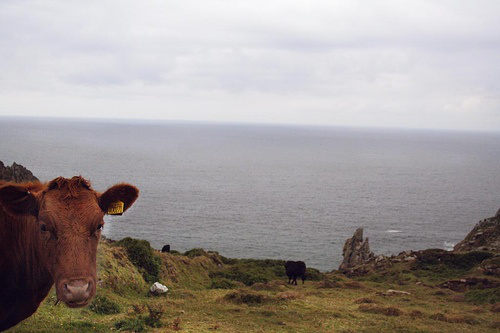

In [11]:
Image.open((path / "train/009463.jpg"))

In [12]:
df = pd.read_csv(path / "train.csv")

In [13]:
df.head(5)

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [14]:
def get_x(r): return (path/"train") / r["fname"]
def get_y(r): return r["labels"].split(" ")
def splitter(df):
  train = df.index[~df["is_valid"]].tolist()
  valid = df.index[df["is_valid"]].tolist()
  return train,valid
  
pascal_block = DataBlock(blocks=(ImageBlock, MultiCategoryBlock), 
                         get_x=get_x, 
                         get_y=get_y, 
                         splitter=splitter,
                         item_tfms= RandomResizedCrop(128, min_scale=0.35))

In [15]:
dls = pascal_block.dataloaders(df)

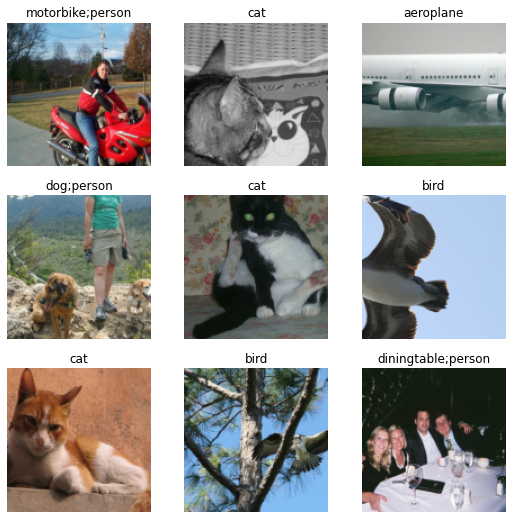

In [16]:
dls.show_batch()

In [17]:
learn = cnn_learner(dls, resnet34, metrics=accuracy_multi)
learn.fine_tune(3, freeze_epochs=2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.975407,0.709062,0.598108,00:27
1,0.796512,0.432668,0.843984,00:26


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.480018,0.305556,0.923267,00:27
1,0.352978,0.184605,0.955737,00:27
2,0.275943,0.169939,0.956115,00:27


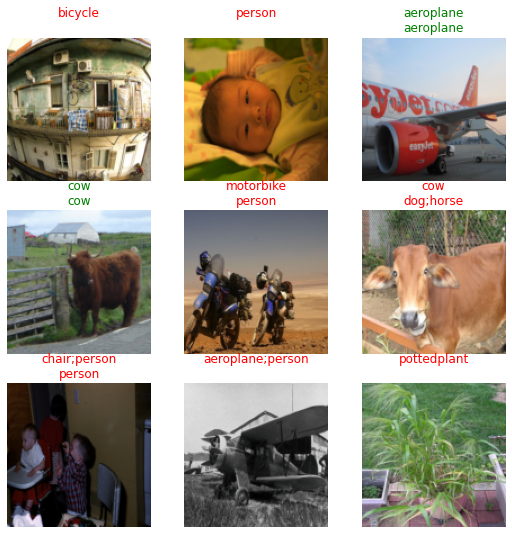

In [22]:
learn.show_results()

In [42]:
upload = FileUpload()
out_pl = Output()
lbl_pred = Label()
btn_run = Button(description="classify")

def on_click_classify(change):
  img = PILImage.create(upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128, 128))
  pred, pred_idx, probs = learn.predict(tensor(img))
  lbl_pred.value = f'Prediction {pred}, Probability: {probs[pred_idx]}'

btn_run.on_click(on_click_classify)

In [ ]:
VBox([upload, btn_run, out_pl, lbl_pred])

In [26]:
learn.predict(upload.data[-1])
print(pred)
print(list(zip(dls.vocab, probs)))

['person']
[('aeroplane', tensor(0.0424)), ('bicycle', tensor(0.0998)), ('bird', tensor(0.0854)), ('boat', tensor(0.0550)), ('bottle', tensor(0.1467)), ('bus', tensor(0.0403)), ('car', tensor(0.0434)), ('cat', tensor(0.1269)), ('chair', tensor(0.1652)), ('cow', tensor(0.0817)), ('diningtable', tensor(0.1289)), ('dog', tensor(0.0602)), ('horse', tensor(0.1943)), ('motorbike', tensor(0.0985)), ('person', tensor(0.9940)), ('pottedplant', tensor(0.0998)), ('sheep', tensor(0.1108)), ('sofa', tensor(0.1038)), ('train', tensor(0.1009)), ('tvmonitor', tensor(0.0488))]


In [53]:
dls.vocab

['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']